In [1]:
from __future__ import print_function
import cProfile
import pandas as pd
import tables as tb
import numpy as np
from Util import *
import time
import mplFunctions as mpl
import wfmFunctions as wfm
import sensorFunctions as snf
import tblFunctions as tbl
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12, 8) # Bigger plots
%matplotlib inline
%load_ext autoreload
%autoreload 2
print("This notebook has been run last on {} at {}.".format(time.strftime("%d/%m/%Y"),time.strftime("%H:%M:%S")))

/Applications/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


This notebook has been run last on 19/10/2016 at 00:08:52.


In [20]:
try:
    h5a.close()
    h5i.close()
except:
    pass

In [21]:
#run /Users/Gonzalo/github/IC/Cities/ANASTASIA.py -c /Users/Gonzalo/github/IC/Config/ANASTASIA_default.csv

In [22]:
h5a = tb.open_file('/Users/Gonzalo/github/IC/data/ANASTASIA1000.h5')
h5i = tb.open_file('/Users/Gonzalo/github/IC/data/ISIDORA1000.h5')
print(h5a,h5i)

/Users/Gonzalo/github/IC/data/ANASTASIA1000.h5 (File) ''
Last modif.: 'Wed Oct 19 00:46:04 2016'
Object Tree: 
/ (RootGroup) ''
/Detector (Group) ''
/Detector/DetectorGeometry (Table(1,)) ''
/MC (Group) ''
/MC/MCTracks (Table(81960,), zlib(1)) ''
/Sensors (Group) ''
/Sensors/DataPMT (Table(12,)) ''
/Sensors/DataSiPM (Table(1789,)) ''
/ZS (Group) ''
/ZS/PMT (Table(382937,), shuffle, zlib(1)) 'Store for PMTs ZSWF'
/ZS/SiPM (Table(44099,), shuffle, zlib(1)) 'Store for SiPMs ZSWF'
 /Users/Gonzalo/github/IC/data/ISIDORA1000.h5 (File) ''
Last modif.: 'Tue Oct 18 15:41:50 2016'
Object Tree: 
/ (RootGroup) ''
/BLR (Group) ''
/BLR/mau (EArray(1000, 32000), shuffle, zlib(1)) ''
/BLR/pulse_on (EArray(1000, 32000), shuffle, zlib(1)) ''
/BLR/wait_over (EArray(1000, 32000), shuffle, zlib(1)) ''
/Detector (Group) ''
/Detector/DetectorGeometry (Table(1,)) ''
/MC (Group) ''
/MC/FEE (Table(1,)) 'EP-FEE parameters'
/MC/MCTracks (Table(81960,), zlib(1)) ''
/RD (Group) ''
/RD/pmtblr (EArray(1000, 12, 32000

In [23]:
pmttwf   = h5i.root.TWF.PMT
sipmtwf  = h5i.root.TWF.SiPM
pmtblr   = h5i.root.RD.pmtblr
pmtcwf   = h5i.root.RD.pmtcwf
pmtrwf   = h5i.root.RD.pmtrwf
sipmrwf  = h5i.root.RD.sipmrwf
pmtzswf  = h5a.root.ZS.PMT
sipmzswf = h5a.root.ZS.SiPM
pmtdf    = snf.read_data_sensors(h5a.root.Sensors.DataPMT)
sipmdf   = snf.read_data_sensors(h5a.root.Sensors.DataSiPM)

In [6]:
pmt12 = pmtcwf[0].sum(axis=0)

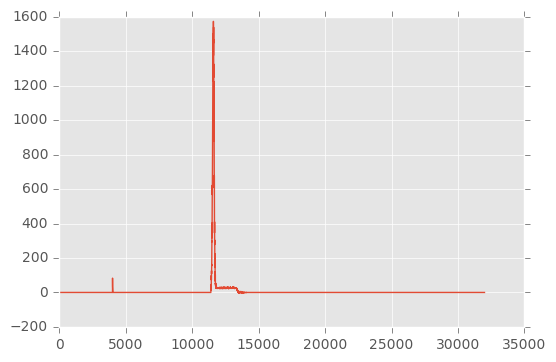

In [254]:
plt.plot(pmt12)

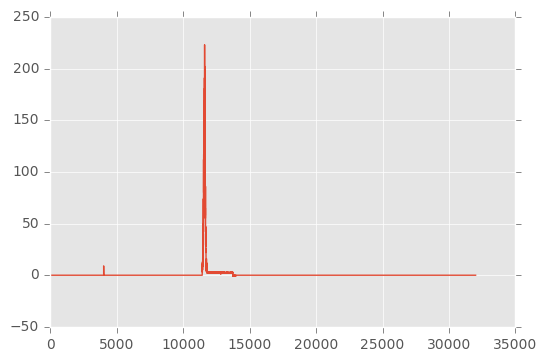

In [255]:
plt.plot(pmtcwf[0,0])
#plt.ylim((-1,5))

In [256]:
a = tbl.read_wf_table(pmttwf,0)
print(a.sum().sum(axis=1).ene_pes)

11098.0


In [257]:
a=pmtzswf.read_where(condition='event==0')
a

array([(0L, 12L, 100.0250015258789, 1.7032424211502075),
       (0L, 12L, 100.05000305175781, 3.5429625511169434),
       (0L, 12L, 100.07499694824219, 3.975395917892456),
       (0L, 12L, 100.0999984741211, 3.565337657928467),
       (0L, 12L, 100.125, 2.6533970832824707),
       (0L, 12L, 100.1500015258789, 2.4998185634613037),
       (0L, 12L, 100.17500305175781, 2.3899614810943604),
       (0L, 12L, 100.19999694824219, 1.9422444105148315),
       (0L, 12L, 285.6000061035156, 2.115849256515503),
       (0L, 12L, 285.625, 1.791792631149292),
       (0L, 12L, 285.79998779296875, 2.551248073577881),
       (0L, 12L, 285.82501220703125, 3.9312310218811035),
       (0L, 12L, 285.8500061035156, 3.5096435546875),
       (0L, 12L, 285.875, 3.565455436706543),
       (0L, 12L, 285.8999938964844, 2.7864503860473633),
       (0L, 12L, 285.92498779296875, 3.1644339561462402),
       (0L, 12L, 285.95001220703125, 3.809248685836792),
       (0L, 12L, 285.9750061035156, 4.391174793243408),
       

11466.5208006


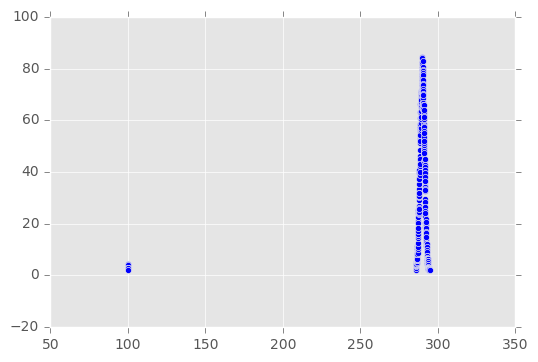

In [27]:
a = tbl.read_wf(pmtzswf,0,12)
print(sum(a[1]))
plt.scatter(a[0],a[1])
#plt.xlim((399,400))
#plt.ylim((-1,5))

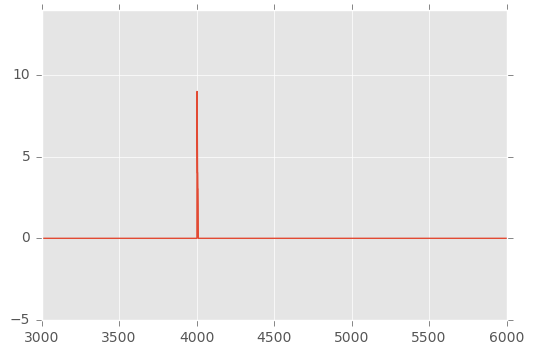

In [28]:
#S1!!
mpl.plts(pmtcwf[0,0],signal_start=3000,signal_end=6000,offset=5)

In [260]:
def sum_evt(wf):
    return np.sum(wf[1])

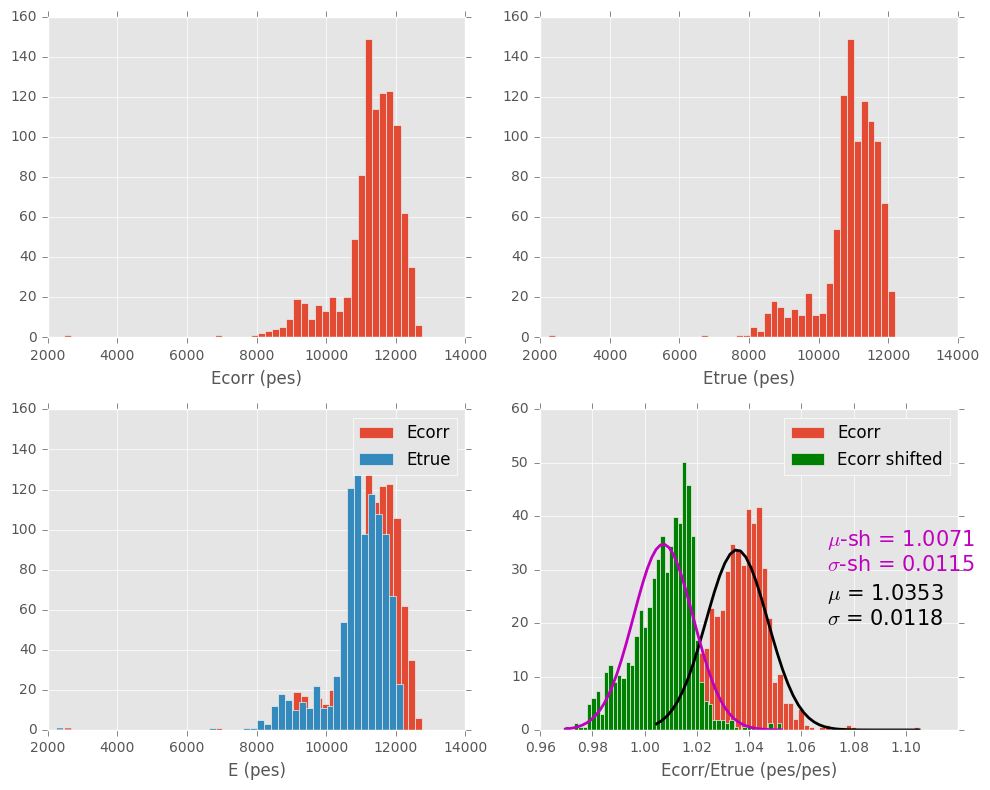

In [26]:
from scipy.stats import norm
import matplotlib.mlab as mlab

nevts = pmtrwf.shape[0]
nbins = 50
Etrue = np.empty(nevts)
Ecorr = np.empty(nevts)

for i in range(nevts):
    Ecorr[i] = np.sum(tbl.read_wf(pmtzswf,i,12)[1])
    Etrue[i] = tbl.read_wf_table(pmttwf,i).sum().sum(axis=1).ene_pes
    '''
    if Ecorr[i] < 1000:
        print(i)
        t,e = tbl.read_wf(pmtzswf,i,12)
        plt.scatter(t,e)
        plt.show()
        raw_input()
    '''

c0,c1 = np.polyfit(Etrue,Ecorr,1)

Eratio = Ecorr/Etrue
EratioCorr = (Ecorr-c1)/Etrue

fig, axes = plt.subplots(2,2)
fig.set_size_inches(10,8)
hcorr  = axes[0,0].hist(Ecorr,nbins)
htrue  = axes[0,1].hist(Etrue,nbins)
hcorr  = axes[1,0].hist(Ecorr,nbins,label='Ecorr')
htrue  = axes[1,0].hist(Etrue,nbins,label='Etrue')
axes[1,0].legend()
hratio = axes[1,1].hist(Eratio,nbins,normed=True,label='Ecorr')
hratioCorr = axes[1,1].hist(EratioCorr,nbins,normed=True,label='Ecorr shifted',color='g')
axes[1,1].legend()

axes[0,0].set_xlabel('Ecorr (pes)')
axes[0,1].set_xlabel('Etrue (pes)')
axes[1,0].set_xlabel('E (pes)')
axes[1,1].set_xlabel('Ecorr/Etrue (pes/pes)')


bins = hratio[1]
mu,sigma = norm.fit(Eratio)
y = mlab.normpdf( bins, mu, sigma)

binsC = hratioCorr[1]
muC,sigmaC = norm.fit(EratioCorr)
yC = mlab.normpdf( binsC, muC, sigmaC)

axes[1,1].text(1.07,20,'$\mu$ = {:.4f}\n$\sigma$ = {:.4f}'.format(mu,sigma),fontsize=15,color='k')
axes[1,1].text(1.07,30,'$\mu$-sh = {:.4f}\n$\sigma$-sh = {:.4f}'.format(muC,sigmaC),fontsize=15,color='m')

ratiof = axes[1,1].plot(bins, y, 'k-', linewidth=2)
ratiofC = axes[1,1].plot(binsC, yC, 'm-', linewidth=2)

plt.tight_layout()


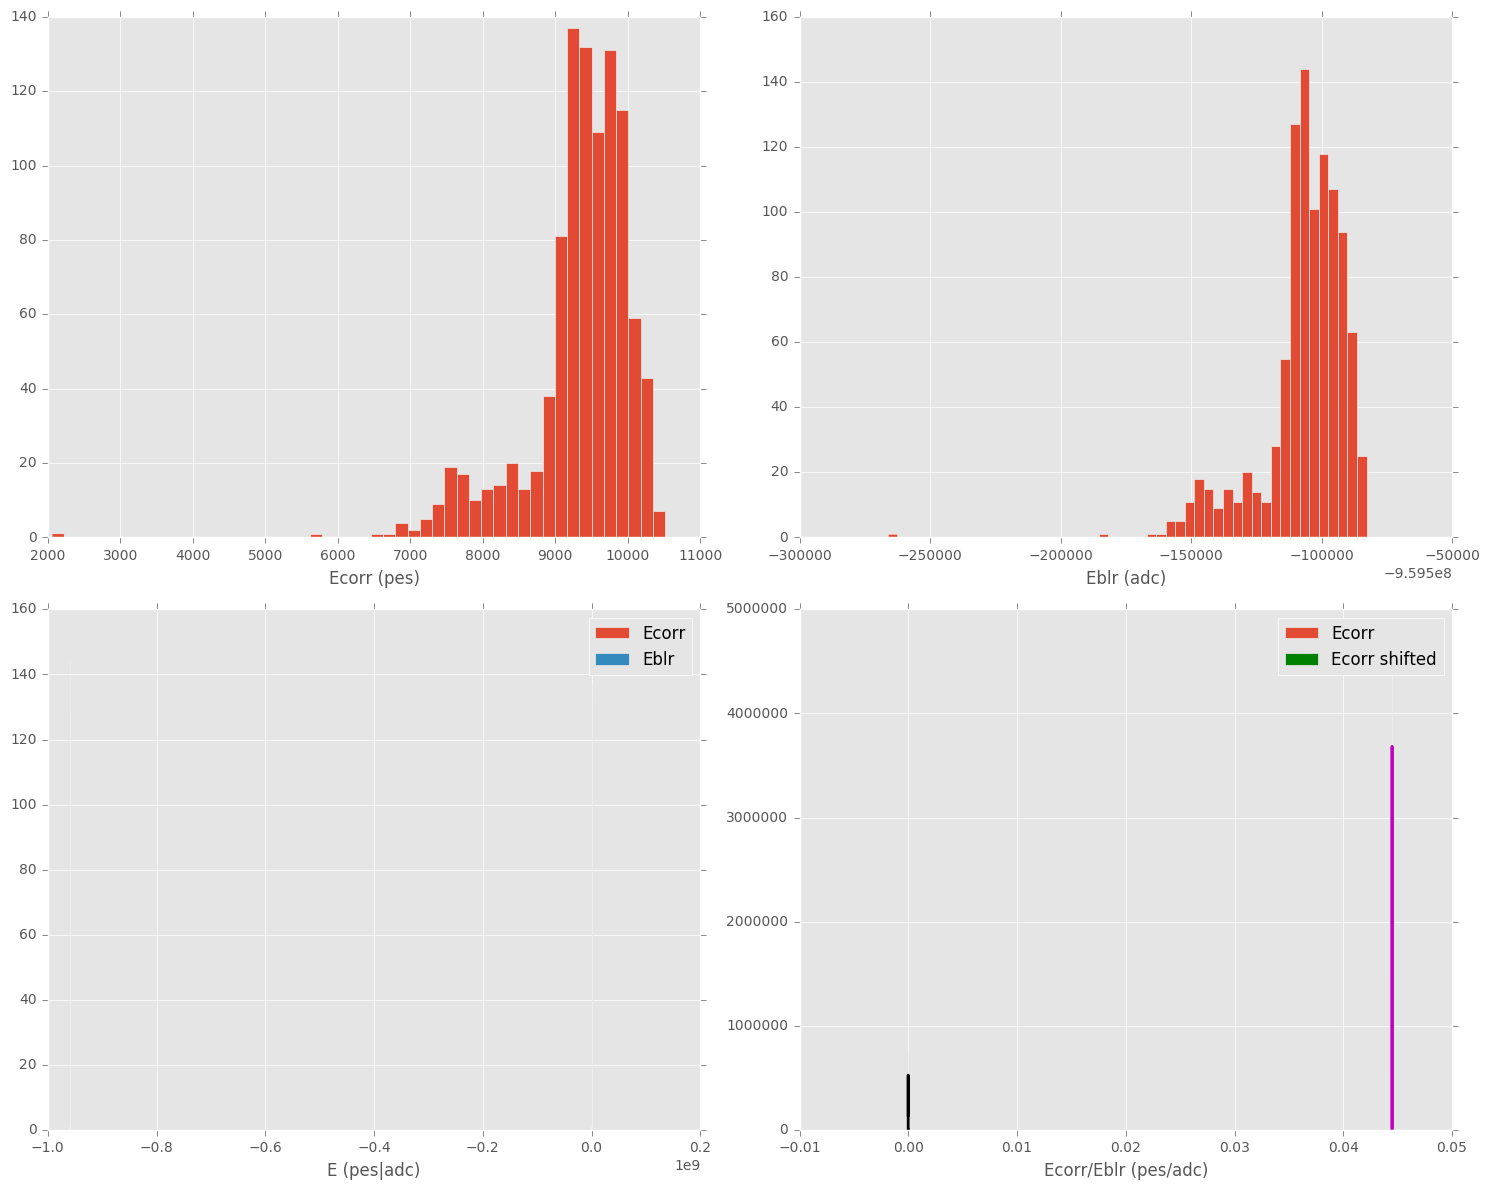

In [280]:
from scipy.stats import norm
import matplotlib.mlab as mlab

nevts = pmtrwf.shape[0]
nbins = 50
Etrue = np.empty(nevts)
Ecorr = np.empty(nevts)

for i in range(nevts):
    Ecorr[i] = np.sum(tbl.read_wf(pmtzswf,i,12)[1])
    Etrue[i] = -pmtblr[i].sum()

c0,c1 = np.polyfit(Etrue,Ecorr,1)

Eratio = Ecorr/Etrue
EratioCorr = (Ecorr-c1)/Etrue

fig, axes = plt.subplots(2,2)
fig.set_size_inches(15,12)
hcorr  = axes[0,0].hist(Ecorr,nbins)
htrue  = axes[0,1].hist(Etrue,nbins)
hcorr  = axes[1,0].hist(Ecorr,nbins,label='Ecorr')
htrue  = axes[1,0].hist(Etrue,nbins,label='Eblr')
axes[1,0].legend()
hratio = axes[1,1].hist(Eratio,nbins,normed=True,label='Ecorr')
hratioCorr = axes[1,1].hist(EratioCorr,nbins,normed=True,label='Ecorr shifted',color='g')
axes[1,1].legend()

axes[0,0].set_xlabel('Ecorr (pes)')
axes[0,1].set_xlabel('Eblr (adc)')
axes[1,0].set_xlabel('E (pes|adc)')
axes[1,1].set_xlabel('Ecorr/Eblr (pes/adc)')


bins = hratio[1]
mu,sigma = norm.fit(Eratio)
y = mlab.normpdf( bins, mu, sigma)

binsC = hratioCorr[1]
muC,sigmaC = norm.fit(EratioCorr)
yC = mlab.normpdf( binsC, muC, sigmaC)

#axes[1,1].text(.88,30,'$\mu$ = {:.4f}\n$\sigma$ = {:.4f}'.format(mu,sigma),fontsize=15,color='k')
#axes[1,1].text(.88,40,'$\mu$-sh = {:.4f}\n$\sigma$-sh = {:.4f}'.format(muC,sigmaC),fontsize=15,color='m')

ratiof = axes[1,1].plot(bins, y, 'k-', linewidth=2)
ratiofC = axes[1,1].plot(binsC, yC, 'm-', linewidth=2)

plt.tight_layout()


(array([ 3.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,  2.,  0.,  0.,
         0.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  1.,  1.,  0.,  3.,
         2.,  1.,  4.,  8.,  7.,  6.,  7.,  4.,  4.,  1.,  7.,  3.,  6.,
         6.,  1.,  3.,  7.,  3.,  1.,  2.,  1.,  0.,  0.,  1.]),
 array([  8477.  ,   8555.02,   8633.04,   8711.06,   8789.08,   8867.1 ,
          8945.12,   9023.14,   9101.16,   9179.18,   9257.2 ,   9335.22,
          9413.24,   9491.26,   9569.28,   9647.3 ,   9725.32,   9803.34,
          9881.36,   9959.38,  10037.4 ,  10115.42,  10193.44,  10271.46,
         10349.48,  10427.5 ,  10505.52,  10583.54,  10661.56,  10739.58,
         10817.6 ,  10895.62,  10973.64,  11051.66,  11129.68,  11207.7 ,
         11285.72,  11363.74,  11441.76,  11519.78,  11597.8 ,  11675.82,
         11753.84,  11831.86,  11909.88,  11987.9 ,  12065.92,  12143.94,
         12221.96,  12299.98,  12378.  ]),
 <a list of 50 Patch objects>)

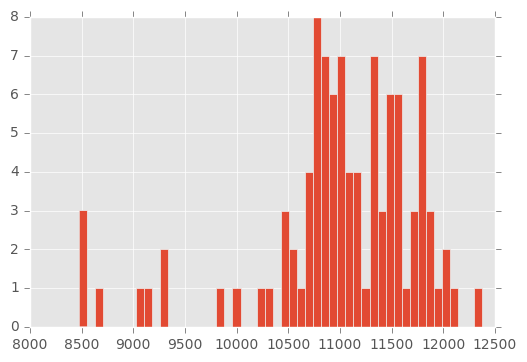

In [166]:
E = []
for i in range(100):
    E.append( tbl.read_wf_table(pmttwf,i).sum().sum(axis=1).ene_pes )

plt.hist(np.array(E),)